# Data Science - Getting Started with Python

Following are exercises you should complete. Workflow:

1. Complete the exercises! This means fill out the code cells, and run them (shift-enter or click the play button that appears when you're in one of them)
2. Take a look at your work, and write comments/add text cells as appropriate to explain
3. Upload the notebook to your GitHub repository and submit a link [here](https://docs.google.com/forms/d/e/1FAIpQLScdlw-GN3tHPHxROIulxoPmxXmvK-UmXco3lgjiJ0Ckltn6QA/viewform?usp=sf_link)

## Exercise 1 - A bit of Math

For these "word" problems, use Python to clearly solve them. Your code will "show your work" - use good variable names! To show your answers you should write a `print()` statement at the end.

### a) It's a gas

A taxi driver is calculating their profit over two weeks by adding up the fares they charge and subtracting the cost of gas. The price of gas changes over time - it was `$3.52`/gallon the first week and `$3.57`/gallon this second week. Their car gets 20 miles per gallon.

For the first week the driver had a total of 23 passengers with average `$29` fare each, and drove a total of 160 miles. For the second week they had 17 passengers with average `$30` fare each, and drove a total of 220 miles. Assume that for both weeks they purchase all the gas needed during that week (i.e. they refuel every week to maintain a constant level of gas in the tank).

Based on the above, answer the following questions:

- What is their total profit over both weeks?
- During which week was their average (mean) profit per passenger higher?


In [96]:
# your code here
import pandas as pd

#setup variables into data frame
data = pd.DataFrame({'week':[1,2],
                    'gas_px':[3.52,3.57],
                    'passengers':[23,17],
                    'fare':[29,30],
                    'distance':[160,220]})
data = data.set_index('week')

#get derived values
data_derived = pd.DataFrame({'revenue':data['passengers'] * data['fare'],
                            'gas_cost':data['distance']/20 * data['gas_px'],
                            'income':data['passengers'] * data['fare'] - \
                             data['distance']/20 * data['gas_px']})

#consolidate
data = pd.concat([data,data_derived], axis = 1)
print("1) Total income: " + str(round(sum(data['income']),2)))    #To

#compute for mean per passenger and consolidate
data_derived = pd.DataFrame({'ave_income':data['income']/data['passengers']})
data = pd.concat([data,data_derived],axis = 1)

ai1 = data['ave_income'][1]
ai2 = data['ave_income'][2]

if ai1 == ai2:
    str2 = "The average income for the 2 week are the same"
elif ai1> ai2:
    str2 = "Week 1 has a higher average income at $" + str(round(ai1,4)) +" per passenger"
else:
    str2 = "Week 2 has a higher averageS income at $" + str(round(ai2,4)) +" per passenger"

print('2) ' + str2)
data

1) Total income: 1109.57
2) Week 1 has a higher average income at $27.7757 per passenger


,gas_px,passengers,fare,distance,revenue,gas_cost,income,ave_income
week,,,,,,,,
1,3.52,23,29,160,667,28.16,638.84,27.775652
2,3.57,17,30,220,510,39.27,470.73,27.690000


### b) Mo' money...

A cash drawer contains 160 bills, all 10s and 50s. The total value of the 10s and 50s is $1,760.

How many of each type of bill are in the drawer? You can figure this out by trial and error (or by doing algebra with pencil and paper), but try to use loops and conditionals to check a plausible possibilities and stop when you find the correct one.

In [97]:
#let n10 be the number of 10s
#160-n10 will be the number of 50s

#test values of n10 from 0 to 160
for n10 in range(161):
    if 10*n10 + 50*(160-n10) == 1760:
        break
print('There are ' + str(n10) + ' 10 bills and ' + str(160-n10) + ' 50s')



There are 156 10 bills and 4 50s


## Exercise 2 - Drawing a plot

Use NumPy and Matplotlib to draw a scatterplot of uniform random `(x, y)` values all drawn from the `[0, 1]` interval. Helpful documentation:

*   https://matplotlib.org/tutorials/index.html
*   https://docs.scipy.org/doc/numpy/user/quickstart.html

Stretch goal - draw more plots! You can refer to the [Matplotlib gallery](https://matplotlib.org/gallery.html) for inspiration, but don't just reproduce something - try to apply it to your own data.

How to get data? There's *many* ways, but a good place to get started is with [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html):

```
from sklearn import datasets
dir(datasets)
```

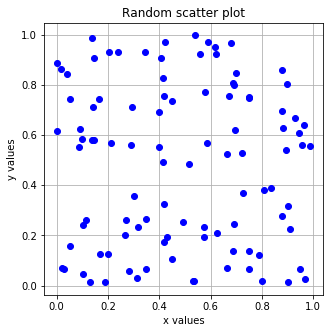

In [98]:
import matplotlib.pyplot as plt
import numpy as np

#generate random numbers
num_items = 100
np.random.seed(1)
x1 = np.random.rand(num_items)
y1 = np.random.rand(num_items)

#create plot
plt.figure(figsize=(5,5))
plt.plot(x1,y1,'bo')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Random scatter plot')
plt.grid(True)
plt.show()

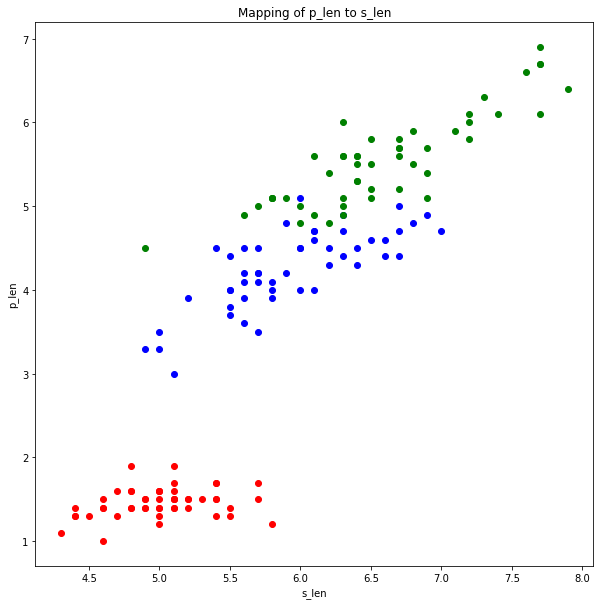

In [99]:
from sklearn import datasets
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#prepare data
dat = datasets.load_iris(True)
item = dat[0]
sorter = dat[1]
dat = pd.DataFrame(item,columns = ['s_len','s_wid','p_len','p_wid'])
dat_class = pd.DataFrame({'kind':sorter})
dat_class
dat_full = pd.concat([dat_class,dat], axis = 1)
dat_full=dat_full.set_index('kind')


#set_axis
x_axis = 's_len'
y_axis = 'p_len'

#plot
x0 = dat_full.loc['0',x_axis]
y0 = dat_full.loc['0',y_axis]
x1 = dat_full.loc['1',x_axis]
y1 = dat_full.loc['1',y_axis]
x2 = dat_full.loc['2',x_axis]
y2 = dat_full.loc['2',y_axis]
plt.figure(figsize=(10,10))
plt.plot(x0,y0,'ro',x1,y1,'bo',x2,y2,'go')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Mapping of ' + y_axis + ' to ' + x_axis)
plt.show()
